In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
datas = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datas.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Required Libraries

In [2]:
import os    # 파일리스트 추출
import glob

import cv2           # 영상 처리 연산
import numpy as np   # 선형대수를 위한 연산

import matplotlib.pyplot as plt  # 시각화

In [3]:
files = '/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_10.tif'

In [4]:
img = cv2.imread(files)

(256, 256, 3)


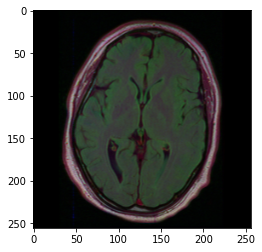

In [5]:
print(img.shape)
plt.imshow(img)

(256, 256)


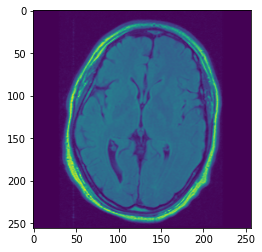

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)

(array([[256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.],
        [256.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.]),
 <a list of 256 BarContainer objects>)

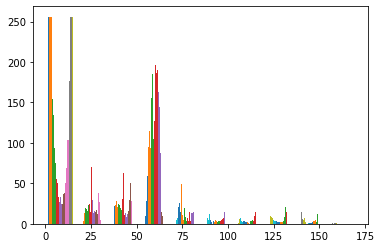

In [7]:
plt.hist(img)

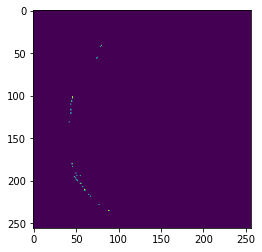

In [8]:
_, thresh = cv2.threshold(img, 153, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

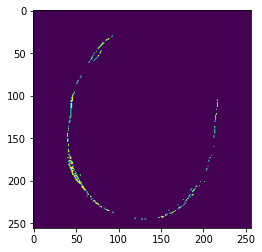

In [9]:
_, thresh = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

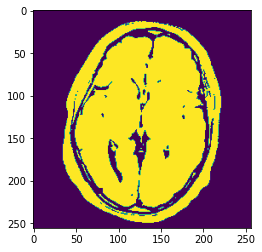

In [10]:
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh)

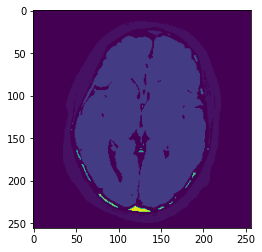

1


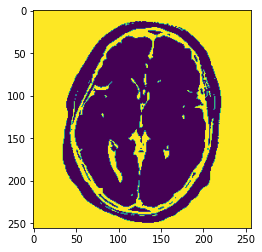

2


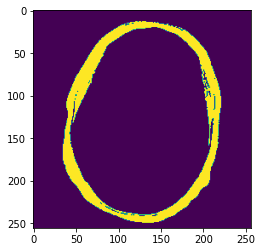

3


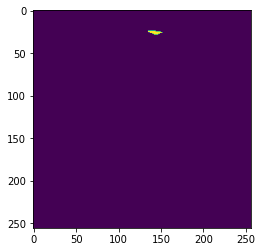

4


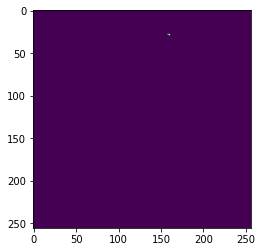

5


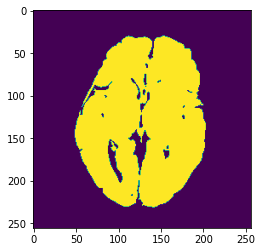

6


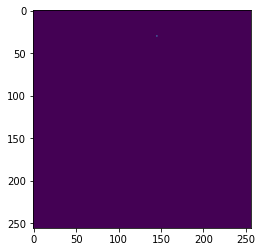

7


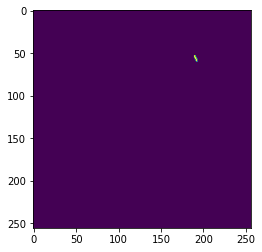

8


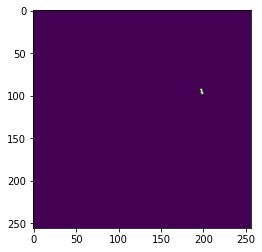

9


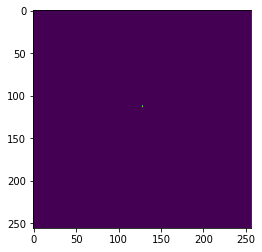

10


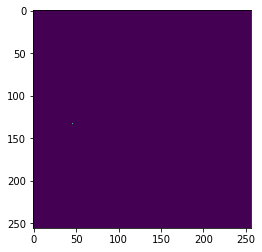

11


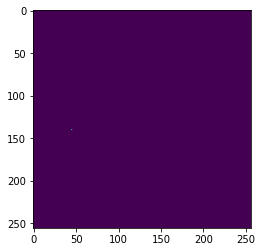

12


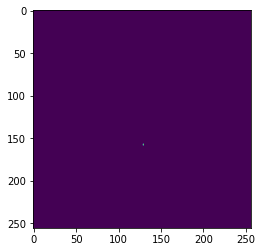

13


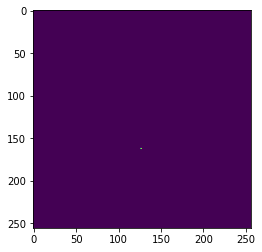

14


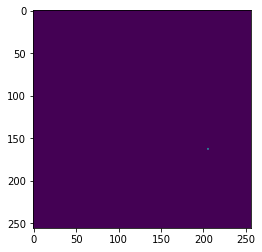

15


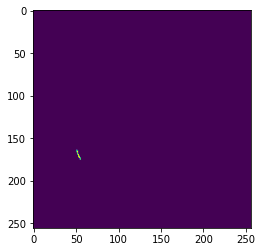

16


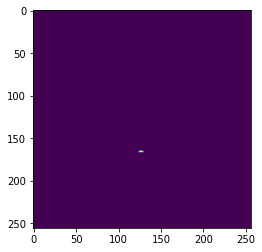

17


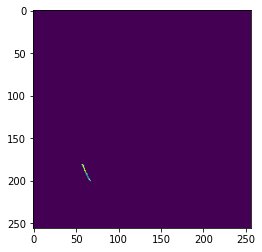

18


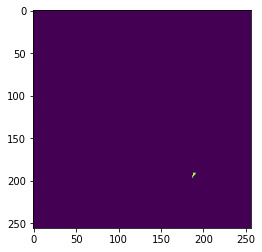

19


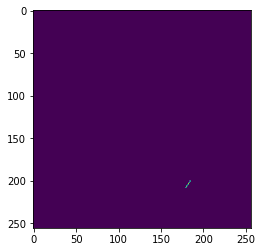

20


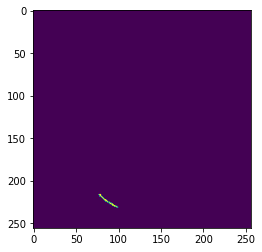

21


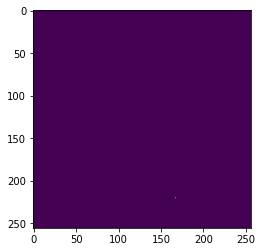

22


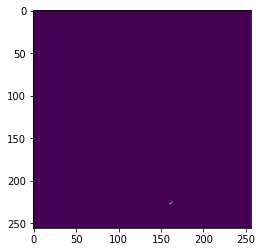

23


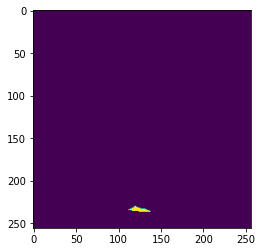

24


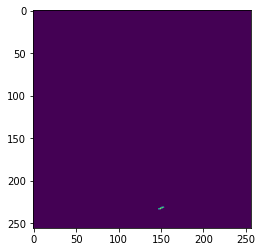

In [11]:
_, markers = cv2.connectedComponents(thresh)
markers = markers + 1
plt.imshow(markers)
plt.show()
for i in np.unique(markers):
    print(i)
    tmp = np.zeros((256, 256))
    tmp[np.where((markers==i))] = 255
    
    plt.imshow(tmp)
    plt.show()

(256, 256)


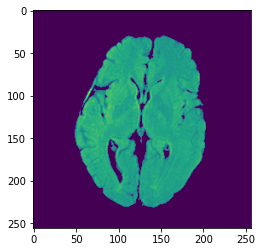

In [12]:
canvas = np.zeros((256, 256), dtype=np.int32)
canvas[np.where((markers==5))] = 1
plt.imshow(canvas*img)
target = np.array(canvas*img, dtype=np.uint8)
print(target.shape)

In [13]:
target_rgb = cv2.cvtColor(target, cv2.COLOR_GRAY2BGR)
target_rgb = np.array(target_rgb, dtype=np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 2.0)
attempts = 15

[ 0 50 61]


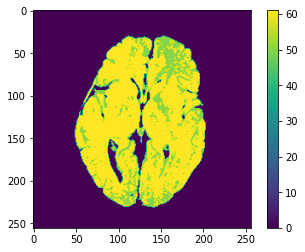

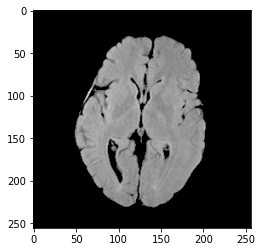

In [14]:
ret, label, center = cv2.kmeans(target_rgb.reshape((-1, 3)), 3, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape((256, 256, 3))
result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
print(np.unique(result))
plt.imshow(result)
plt.colorbar()
plt.show()
plt.imshow(target, cmap='gray')

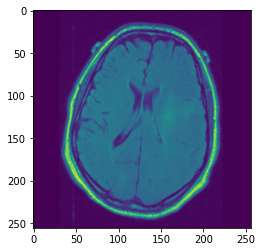

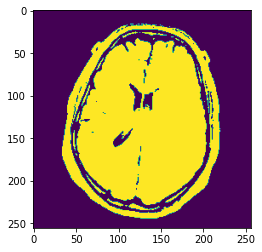

In [15]:
img = '/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_12.tif'
img = cv2.imread(img)

# let's label the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

# hand-crafted label...
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

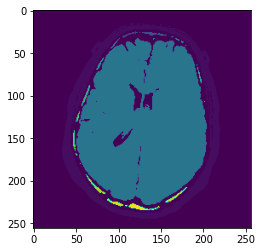

1


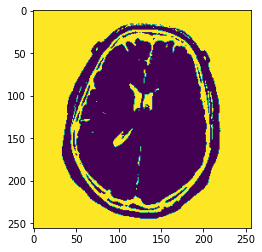

2


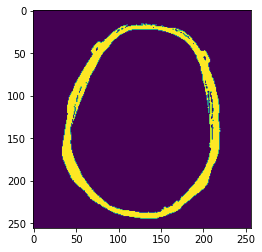

3


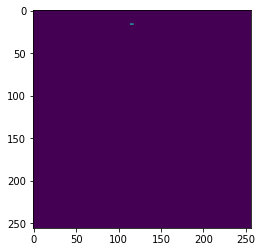

4


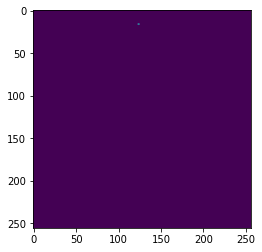

5


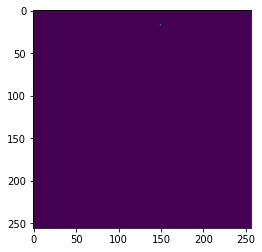

6


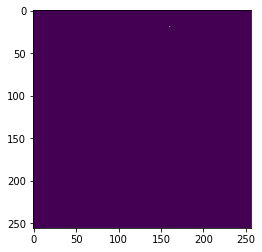

7


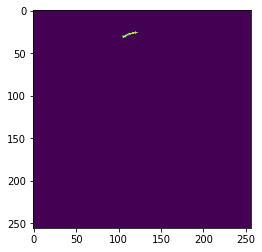

8


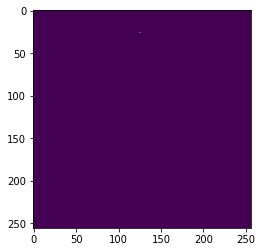

9


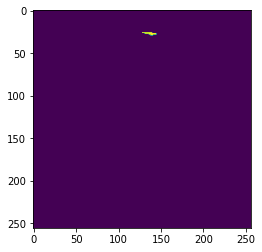

10


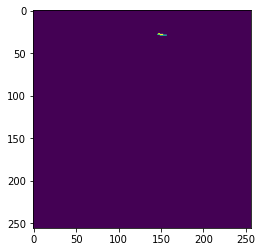

11


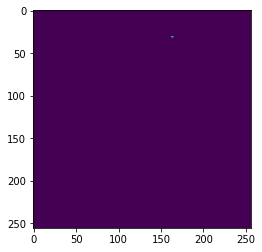

12


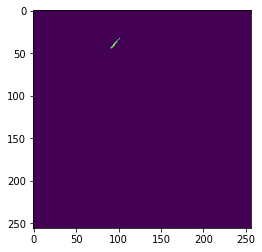

13


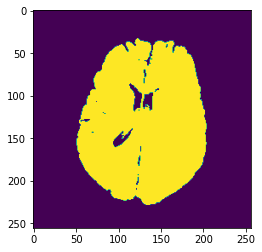

14


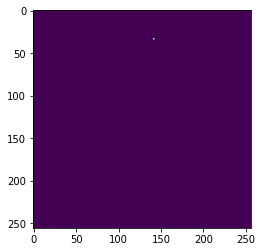

15


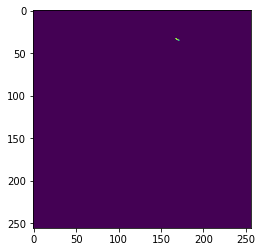

16


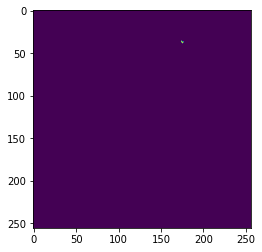

17


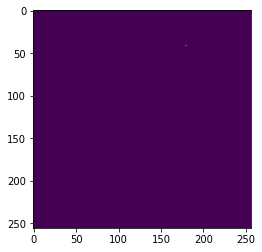

18


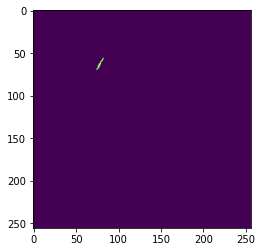

19


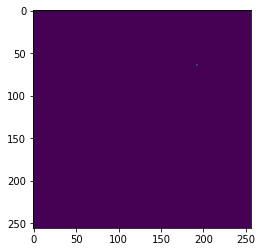

20


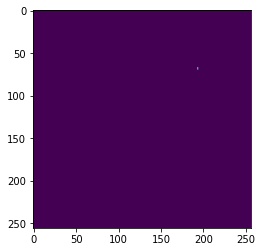

21


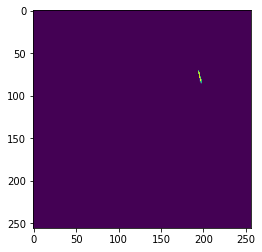

22


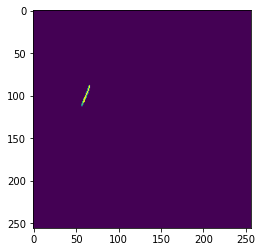

23


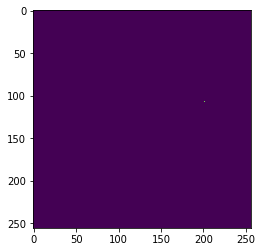

24


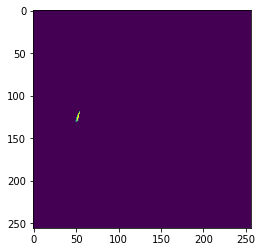

25


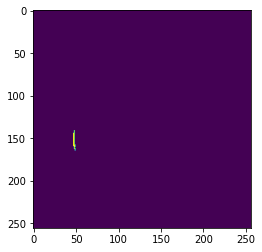

26


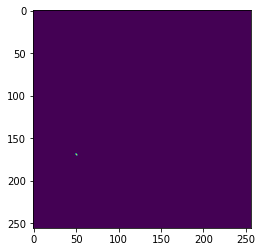

27


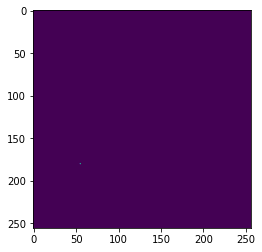

28


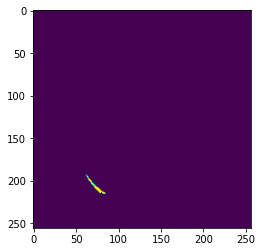

29


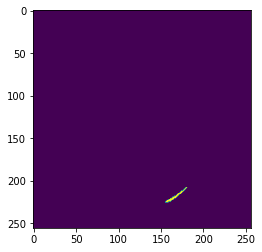

30


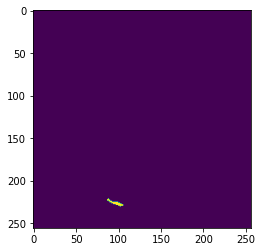

31


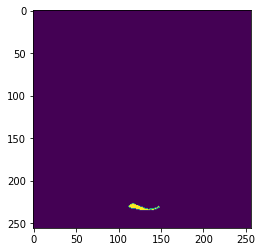

32


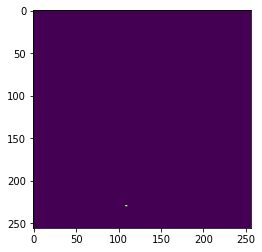

In [16]:
_, markers = cv2.connectedComponents(thresh)
markers = markers + 1
plt.imshow(markers)
plt.show()

for i in np.unique(markers):
    print(i)
    tmp = np.zeros((256, 256))
    tmp[np.where((markers==i))] = 255
    
    plt.imshow(tmp)
    plt.show()

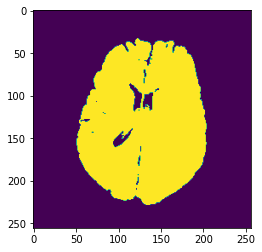

In [17]:
atlas = np.zeros((256, 256))
atlas[np.where((markers==13))] = 255
plt.imshow(atlas)

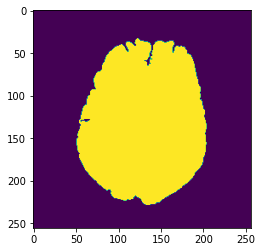

In [18]:
from scipy.ndimage.morphology import binary_fill_holes

kernel = np.ones((5, 5), dtype=np.int32)
atlas = binary_fill_holes(atlas, structure=kernel)

plt.imshow(atlas)

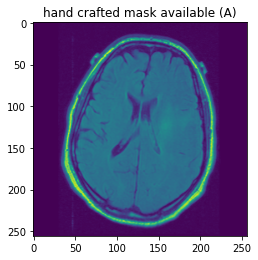

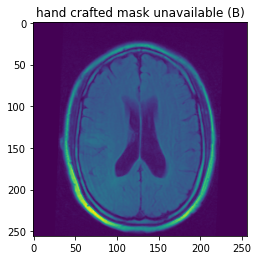

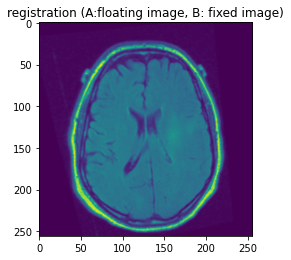

In [19]:
source = '/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_11.tif'
source = cv2.imread(source)
source = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)

warp_mode = cv2.MOTION_HOMOGRAPHY
warp_matrix = np.eye(3, 3, dtype=np.float32)

number_of_iterations = 5000
termination_eps = 1e-10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, number_of_iterations, termination_eps)

cc, warp_matrix = cv2.findTransformECC(source, img, warp_matrix, warp_mode, criteria)

img_warped = cv2.warpPerspective(img, warp_matrix, (256, 256), flags=cv2.INTER_LINEAR+cv2.WARP_INVERSE_MAP)

plt.figure(figsize=(13,13))
plt.subplot(1, 3, 1)
plt.title('hand crafted mask available (A)')
plt.imshow(img)

plt.figure(figsize=(13,13))
plt.subplot(1, 3, 2)
plt.title('hand crafted mask unavailable (B)')
plt.imshow(source)

plt.figure(figsize=(13,13))
plt.subplot(1, 3, 3)
plt.title('registration (A:floating image, B: fixed image)')
plt.imshow(img_warped)

In [20]:
atlas = np.array(atlas, dtype=np.float32)
atlas_warped = cv2.warpPerspective(atlas, warp_matrix, (256, 256), flags=cv2.INTER_LINEAR+cv2.WARP_INVERSE_MAP)

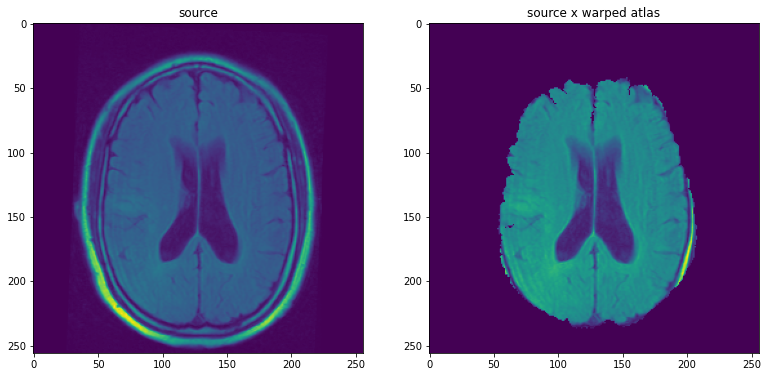

In [21]:
source_mask = np.zeros((256, 256))
source_mask[(np.where(atlas_warped!=0))]=1

plt.figure(figsize=(13, 13))

plt.subplot(1, 2, 1)
plt.title('source')
plt.imshow(source)

plt.subplot(1, 2, 2)
plt.title('source x warped atlas')
plt.imshow(source*source_mask)

# Get Libraries

In [22]:
import os
import cv2
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import torch
import albumentations as A
import albumentations.pytorch

import torch.nn as nn

# Setup Seed

In [23]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
setup_seed(42)

# Data Glancing

In [24]:
root_path = '/kaggle/input/covidqu/'
print(os.listdir(root_path))

['COVID-QU-Ex dataset.txt', 'Infection Segmentation Data', 'Lung Segmentation Data']


In [25]:
lung_seg_path = os.path.join(root_path, 'Lung Segmentation Data')
print(os.listdir(lung_seg_path))
lung_seg_path = os.path.join(lung_seg_path, 'Lung Segmentation Data')
print(os.listdir(os.path.join(lung_seg_path, 'Train')))
print(os.listdir(os.path.join(lung_seg_path,'Train','Normal')))


imgs = [os.path.join(lung_seg_path, 'Train', 'Normal', 'images', i) for i in sorted(os.listdir(os.path.join(lung_seg_path, 'Train', 'Normal', 'images')))]
masks = [os.path.join(lung_seg_path, 'Train', 'Normal', 'lung masks', i) for i in sorted(os.listdir(os.path.join(lung_seg_path, 'Train', 'Normal', 'lung masks')))]

['Lung Segmentation Data']
['Non-COVID', 'Normal', 'COVID-19']
['lung masks', 'images']


In [26]:
print(imgs[:5])
print(masks[:5])
print(len(imgs))

['/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (10293).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (10294).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (10295).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (10296).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/images/Normal (10297).png']
['/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/lung masks/Normal (10293).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/lung masks/Normal (10294).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/lung masks/Normal (10295).png', '/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Train/Normal/lung masks/Normal (10296

In [27]:
def data_glancer(img_path, mask_path):
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    plt.hist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    plt.show()
    plt.imshow(img)
    plt.show()
    plt.hist(cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY))
    plt.show()
    plt.imshow(mask)

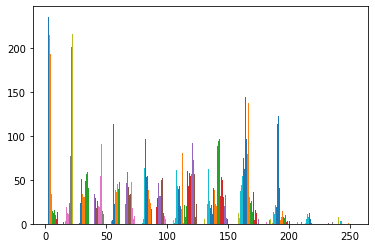

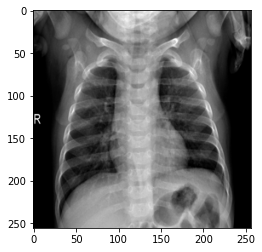

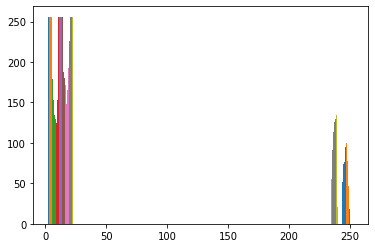

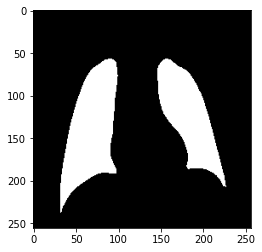

In [28]:
data_glancer(imgs[1000], masks[1000])

# Task Definition is So Important!
### Let us we need an lung extracter for normal patient

# Wrap dataset 

In [29]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, mode, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        
        self.data_dir = os.path.join(self.data_dir, mode, 'Normal')
        
        self.imgs = [os.path.join(self.data_dir, 'images', i) \
                     for i in sorted(os.listdir(os.path.join(self.data_dir, 'images')))]
        self.masks = [os.path.join(self.data_dir, 'lung masks', i) \
                     for i in sorted(os.listdir(os.path.join(self.data_dir, 'lung masks')))]
        
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        img = cv2.imread(self.imgs[index])
        mask = cv2.imread(self.masks[index])
        
        img = cv2.resize(img, dsize=(512, 512))
        mask = cv2.resize(mask, dsize=(512, 512))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        
        img = (img - np.min(img))/(np.max(img)-np.min(img))
        img = img.astype(np.float32)
        
        # thresh value was set as heuristic (need more extensive EDA! (Exploratory Data Analysis))
        _, mask = cv2.threshold(mask, 245, 1, cv2.THRESH_BINARY)  
        mask = np.array(mask, dtype=np.float32)
        
        if img.ndim == 2:  
            img = img[:,:,np.newaxis] 
            
        if mask.ndim==2:
            mask = mask[np.newaxis,:,:]
        
        data = {'img':img, 'mask': mask}
        
        
        if self.transform:
            transformed = self.transform(image=data['img'], mask=data['mask'])
            
            data = {'img':transformed['image'], 'mask':transformed['mask']}
            
        
        return data

In [30]:
train_transform = A.Compose([    
    A.augmentations.transforms.GaussianBlur(p=0.2),
    #A.HorizontalFlip(p=0.5),
    #A.VerticalFlip(p=0.5),
    A.pytorch.transforms.ToTensorV2()
])

test_transform = A.Compose([A.pytorch.transforms.ToTensorV2()])

train_ds = Dataset(data_dir=lung_seg_path, mode='Train', transform=train_transform)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = batch_size, shuffle=True)

val_ds = Dataset(data_dir=lung_seg_path, mode='Val', transform=train_transform)
val_dl = torch.utils.data.DataLoader(train_ds, batch_size = batch_size, shuffle=True)

NameError: name 'batch_size' is not defined

In [ ]:
fn_tonumpy = lambda x : x.to('cpu').detach().numpy().transpose(0,2,3,1)
for idx, data in enumerate(train_dl):
    img = fn_tonumpy(data['img'])
    mask = fn_tonumpy(data['mask'])
    
    for i in range(len(img)):
        plt.imshow(img[i])
        plt.show()
        plt.imshow(mask[i])
        plt.show()
    if idx == 2:
        break

print('='*100)

for idx, data in enumerate(val_dl):
    img = fn_tonumpy(data['img'])
    mask = fn_tonumpy(data['mask'])
    
    for i in range(len(img)):
        plt.imshow(img[i])
        plt.show()
        plt.imshow(mask[i])
        plt.show()
    if idx == 2:
        break

# Segmentation Network Prep

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init

def init_weights(net, init_type='normal', gain=0.02):
    def init_func(m):
        classname = m.__class__.__name__
        if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
            if init_type == 'normal':
                init.normal_(m.weight.data, 0.0, gain)
            elif init_type == 'xavier':
                init.xavier_normal_(m.weight.data, gain=gain)
            elif init_type == 'kaiming':
                init.kaiming_normal_(m.weight.data, a=0, mode='fan_in')
            elif init_type == 'orthogonal':
                init.orthogonal_(m.weight.data, gain=gain)
            else:
                raise NotImplementedError('initialization method [%s] is not implemented' % init_type)
            if hasattr(m, 'bias') and m.bias is not None:
                init.constant_(m.bias.data, 0.0)
        elif classname.find('InstanceNorm2d') != -1:
            init.normal_(m.weight.data, 1.0, gain)
            init.constant_(m.bias.data, 0.0)

    print('initialize network with %s' % init_type)
    net.apply(init_func)



class conv_block(nn.Module):
    def __init__(self,ch_in,ch_out):
        super(conv_block,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3,stride=1,padding=1,bias=True),
            nn.InstanceNorm2d(ch_out),
            nn.LeakyReLU(0.2),
            nn.Conv2d(ch_out, ch_out, kernel_size=3,stride=1,padding=1,bias=True),
            nn.InstanceNorm2d(ch_out),
            nn.LeakyReLU(0.2)
        )
    def forward(self,x):
        x = self.conv(x)
        return x

class dilated_conv_block(nn.Module):
    def __init__(self,ch_in,ch_out):
        super(dilated_conv_block,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3,stride=1,padding=2,bias=True,dilation=2),
            nn.InstanceNorm2d(ch_out),
            nn.LeakyReLU(0.2),
            nn.Conv2d(ch_out, ch_out, kernel_size=3,stride=1,padding=2,bias=True,dilation=2),
            nn.InstanceNorm2d(ch_out),
            nn.LeakyReLU(0.2)
        )
    def forward(self,x):
        x = self.conv(x)
        return x

class up_conv(nn.Module):
    def __init__(self,ch_in,ch_out):
        super(up_conv,self).__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(ch_in,ch_out,kernel_size=3,stride=1,padding=1,bias=True),
		    nn.InstanceNorm2d(ch_out),
			nn.LeakyReLU(0.2)
        )
    def forward(self,x):
        x = self.up(x)
        return x

class Recurrent_block(nn.Module):
    def __init__(self,ch_out,t=2):
        super(Recurrent_block,self).__init__()
        self.t = t
        self.ch_out = ch_out
        self.conv = nn.Sequential(
            nn.Conv2d(ch_out,ch_out,kernel_size=3,stride=1,padding=1,bias=True),
		    nn.InstanceNorm2d(ch_out),
			nn.LeakyReLU(0.2)
        )

    def forward(self,x):
        for i in range(self.t):

            if i==0:
                x1 = self.conv(x)
            
            x1 = self.conv(x+x1)
        return x1
        
class RRCNN_block(nn.Module):
    def __init__(self,ch_in,ch_out,t=2):
        super(RRCNN_block,self).__init__()
        self.RCNN = nn.Sequential(
            Recurrent_block(ch_out,t=t),
            Recurrent_block(ch_out,t=t)
        )
        self.Conv_1x1 = nn.Conv2d(ch_in,ch_out,kernel_size=1,stride=1,padding=0)

    def forward(self,x):
        x = self.Conv_1x1(x)
        x1 = self.RCNN(x)
        return x+x1


class single_conv(nn.Module):
    def __init__(self,ch_in,ch_out):
        super(single_conv,self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(ch_in, ch_out, kernel_size=3,stride=1,padding=1,bias=True),
            nn.InstanceNorm2d(ch_out),
            nn.LeakyReLU(0.2)
        )

    def forward(self,x):
        x = self.conv(x)
        return x

class Attention_block(nn.Module):
    def __init__(self,F_g,F_l,F_int):
        super(Attention_block,self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1,stride=1,padding=0,bias=True),
            nn.InstanceNorm2d(F_int)
            )
        
        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1,stride=1,padding=0,bias=True),
            nn.InstanceNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1,stride=1,padding=0,bias=True),
            nn.InstanceNorm2d(1),
            nn.Sigmoid()
        )
        
        self.relu = nn.LeakyReLU(0.2)
        
    def forward(self,g,x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1+x1)
        psi = self.psi(psi)

        return x*psi

In [ ]:
class U_Net(nn.Module):
    def __init__(self,img_ch=3,output_ch=1):
        super(U_Net,self).__init__()
        
        self.Maxpool = nn.MaxPool2d(kernel_size=2,stride=2)

        self.Conv1 = conv_block(ch_in=img_ch,ch_out=64)
        self.Conv2 = conv_block(ch_in=64,ch_out=128)
        self.Conv3 = conv_block(ch_in=128,ch_out=256)
        self.Conv4 = conv_block(ch_in=256,ch_out=512)
        self.Conv5 = conv_block(ch_in=512,ch_out=1024)

        self.Up5 = up_conv(ch_in=1024,ch_out=512)
        self.Up_conv5 = conv_block(ch_in=1024, ch_out=512)

        self.Up4 = up_conv(ch_in=512,ch_out=256)
        self.Up_conv4 = conv_block(ch_in=512, ch_out=256)
        
        self.Up3 = up_conv(ch_in=256,ch_out=128)
        self.Up_conv3 = conv_block(ch_in=256, ch_out=128)
        
        self.Up2 = up_conv(ch_in=128,ch_out=64)
        self.Up_conv2 = conv_block(ch_in=128, ch_out=64)

        self.Conv_1x1 = nn.Conv2d(64,output_ch,kernel_size=1,stride=1,padding=0)


    def forward(self,x):
        # encoding path
        x1 = self.Conv1(x)

        x2 = self.Maxpool(x1)
        x2 = self.Conv2(x2)
        
        x3 = self.Maxpool(x2)
        x3 = self.Conv3(x3)

        x4 = self.Maxpool(x3)
        x4 = self.Conv4(x4)

        x5 = self.Maxpool(x4)
        x5 = self.Conv5(x5)

        # decoding + concat path
        d5 = self.Up5(x5)
        d5 = torch.cat((x4,d5),dim=1)
        
        d5 = self.Up_conv5(d5)
        
        d4 = self.Up4(d5)
        d4 = torch.cat((x3,d4),dim=1)
        d4 = self.Up_conv4(d4)

        d3 = self.Up3(d4)
        d3 = torch.cat((x2,d3),dim=1)
        d3 = self.Up_conv3(d3)

        d2 = self.Up2(d3)
        d2 = torch.cat((x1,d2),dim=1)
        d2 = self.Up_conv2(d2)

        d1 = self.Conv_1x1(d2)

        return d1

In [ ]:
net = U_Net().cuda()

# Set Optimizer, Loss (scheduler or etc. if needed)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

ckpt_dir = '/kaggle/working/ckpt'
log_dir = '/kaggle/working/logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

lr = 1e-4
batch_size = 4
num_epoch = 100

num_train = len(train_ds)
num_train_for_epoch = np.ceil(num_train/batch_size) # batch_size 

num_val = len(val_ds)
num_val_for_epoch = np.ceil(num_val/batch_size) 

writer_train = SummaryWriter(log_dir=os.path.join(log_dir,'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir,'val'))

In [ ]:
optim = torch.optim.Adam(net.parameters(), lr = lr, betas=(0.9, 0.999))

# pixel level classification 
loss = torch.nn.BCEWithLogitsLoss().cuda()

# Make Train Loop

In [ ]:
def save(ckpt_dir,net,optim,epoch, flag):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)
        
    torch.save({'net':net.state_dict(),'optim':optim.state_dict()},'%s/U-Net%d.pth'%(ckpt_dir,epoch))
   

In [ ]:
start_epoch = 0
for epoch in range(start_epoch+1,num_epoch +1):

    net.train()
    loss_arr = []
    
    for batch, data in enumerate(train_dl,1):
        x = data['img'].cuda()
        y = data['mask'].cuda()
        
        pred = net(x)
        
        optim.zero_grad()
        
        loss_value = loss(pred, y) 
        loss_arr += [loss_value.item()]
        
        loss_value.backward() 
        optim.step() 
        
        
        print('train : epoch %04d / %04d | Batch %04d \ %04d | Loss %04f | '
              %(epoch,num_epoch,batch,num_train_for_epoch,np.mean(loss_arr)))
        
        
        x = fn_tonumpy(x)
        output = fn_tonumpy(pred)

        writer_train.add_image('input', x, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        writer_train.add_image('output', output, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        

    writer_train.add_scalar('loss', np.mean(loss_arr), epoch)
    
    
    
    
    # validation
    with torch.no_grad(): 
        net.eval()
        loss_arr = []
        for batch, data in enumerate(val_dl,1):
            x = data['img'].to(device)
            y = data['mask'].to(device)
            
            pred = net(x)
            
            loss_value = loss(pred, y) 
            loss_arr += [loss_value.item()]
            
            
            print('train : epoch %04d / %04d | Batch %04d \ %04d | Loss %04f | '
                  %(epoch,num_epoch,batch,num_val_for_epoch,np.mean(loss_arr)))
            
            
            x = fn_tonumpy(x)
            output = fn_tonumpy(pred)
    
            writer_val.add_image('input', x, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
            writer_val.add_image('output', output, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        

        writer_val.add_scalar('loss', np.mean(loss_arr), epoch)
        save(ckpt_dir=ckpt_dir, net = net, optim = optim, epoch = epoch, flag=0)
    
writer_train.close() 
wrtier_val.close()

# End of Segmentation

# Classification

# Glance Data & Wrap Datas 

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, mode, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        
        self.data_dir = os.path.join(self.data_dir, mode)
        
        
        
        self.classes = sorted(os.listdir(self.data_dir))
        print(self.classes)
        #['COVID-19', 'Non-COVID', 'Normal']
        label = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]  # 0-> covid, 1-> noncovid, 2 -> Normal
        self.imgs = [sorted(os.listdir(os.path.join(self.data_dir, i, 'images'))) for i in self.classes]
        
        self.labels = np.array([label[idx] for idx, i in enumerate(self.imgs) for j in i], dtype=np.float32)
        
        self.imgs = [os.path.join(self.data_dir, self.classes[idx], 'images',j) for idx, i in enumerate(self.imgs) for j in i]
        print(len(self.imgs), len(self.labels))
    
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, index):
        img = cv2.imread(self.imgs[index])
        img = cv2.resize(img, dsize=(512, 512))
        img = img.astype(np.float32)
        img = (img - np.min(img))/(np.max(img)-np.min(img))
        
        if img.ndim == 2:  
            img = img[:,:,np.newaxis] 
            
        data = {'img':img, 'label': self.labels[index]}
        
        
        if self.transform:
            transformed = self.transform(image=data['img'])
            
            data = {'img':transformed['image'], 'label':data['label']}
        
        return data

In [ ]:
train_ds = Dataset(data_dir=lung_seg_path, mode='Train', transform=train_transform)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = batch_size, shuffle=True)

val_ds = Dataset(data_dir=lung_seg_path, mode='Val', transform=train_transform)
vak_dl = torch.utils.data.DataLoader(train_ds, batch_size = batch_size, shuffle=True)

In [ ]:
fn_tonumpy = lambda x : x.to('cpu').detach().numpy().transpose(0,2,3,1)
for idx, data in enumerate(train_dl):
    img = fn_tonumpy(data['img'])
    label = data['label']
    
    for i in range(len(img)):
        print(label[i])
        plt.imshow(img[i])
        plt.show()
        
    if idx == 2:
        break



# Get Classification Network

In [ ]:
import torch.nn as nn
import torch
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ConvBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels,
                               kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        return x
class VGG(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG, self).__init__()
        # example Input_shape: [B 3 224 224]
        self.step_1 = nn.Sequential(
            ConvBlock(3, 64),
            ConvBlock(64, 64)
        )
        # shape: [B 128 112 112]
        self.step_2 = nn.Sequential(
            ConvBlock(64, 128, stride=2),
            ConvBlock(128, 128)
        )
        # shape: [B 256 56 56]
        self.step_3 = nn.Sequential(
            ConvBlock(128, 256, stride=2),
            ConvBlock(256, 256),
            ConvBlock(256, 256),
            ConvBlock(256, 256)
        )
        # shape: [B 512 28 28]
        self.step_4 = nn.Sequential(
            ConvBlock(256, 512, stride=2),
            ConvBlock(512, 512),
            ConvBlock(512, 512),
            ConvBlock(512, 512)
        )
        # shape: [B 512 14 14]
        self.step_5 = nn.Sequential(
            ConvBlock(512, 512, stride=2),
            ConvBlock(512, 512),
            ConvBlock(512, 512),
            ConvBlock(512, 512)
        )
        # shape: [B 512 7 7]
        self.avgpool = nn.AdaptiveAvgPool2d(7)
        # reshape as [B (512* 7* 7)]
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.relu1 = nn.ReLU(True)
        self.drop1 = nn.Dropout()
        # shape: [B 4096]
        self.fc2 = nn.Linear(4096, 1024)
        self.relu2 = nn.ReLU(inplace=True)
        self.drop2 = nn.Dropout()
        self.classifier = nn.Linear(1024, num_classes)
    def forward(self, x):
        # shape: [B 3 224 224]
        x = self.step_1(x)
        # shape: [B 128 112 112]
        x = self.step_2(x)
        # shape: [B 256 56 56]
        x = self.step_3(x)
        # shape: [B 512 28 28]
        x = self.step_4(x)
        # shape: [B 512 14 14]
        x = self.step_5(x)
        # shape: [B 512 7 7]
        x = self.avgpool(x)
        # shape: [B (512* 7* 7)]
        x = x.view(x.size(0), -1)
        # shape: [B 4096]
        x = self.fc1(x)
        x = self.relu1(x)
        # shape: [B 1024]
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        out = self.classifier(x)
        return out


In [ ]:
net = VGG(num_classes=3).cuda()

In [ ]:
from torch.utils.tensorboard import SummaryWriter

ckpt_dir = '/kaggle/working/ckpt'
log_dir = '/kaggle/working/logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

lr = 1e-4
batch_size = 4
num_epoch = 100

num_train = len(train_ds)
num_train_for_epoch = np.ceil(num_train/batch_size) # batch_size 

num_val = len(val_ds)
num_val_for_epoch = np.ceil(num_val/batch_size) 

writer_train = SummaryWriter(log_dir=os.path.join(log_dir,'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir,'val'))

In [ ]:
optim = torch.optim.Adam(net.parameters(), lr = lr, betas=(0.9, 0.999))

# pixel level classification 
loss = torch.nn.BCEWithLogitsLoss().cuda()

In [ ]:
start_epoch = 0
for epoch in range(start_epoch+1,num_epoch +1):

    net.train()
    loss_arr = []
    
    for batch, data in enumerate(train_dl,1):
        x = data['img'].cuda()
        y = data['label'].cuda()
        
        pred = net(x)
        
        optim.zero_grad()
        
        loss_value = loss(pred, y) 
        loss_arr += [loss_value.item()]
        
        loss_value.backward() 
        optim.step() 
        
        
        print('train : epoch %04d / %04d | Batch %04d \ %04d | Loss %04f | '
              %(epoch,num_epoch,batch,num_train_for_epoch,np.mean(loss_arr)))
        
        
        x = fn_tonumpy(x)
        

        writer_train.add_image('input', x, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        
        

    writer_train.add_scalar('loss', np.mean(loss_arr), epoch)
    
    
    
    
    # validation
    with torch.no_grad(): 
        net.eval()
        loss_arr = []
        for batch, data in enumerate(val_dl,1):
            x = data['img'].to(device)
            y = data['mask'].to(device)
            
            pred = net(x)
            
            loss_value = loss(pred, y) 
            loss_arr += [loss_value.item()]
            
            
            print('valid : epoch %04d / %04d | Batch %04d \ %04d | Loss %04f | '
                  %(epoch,num_epoch,batch,num_val_for_epoch,np.mean(loss_arr)))
            
            
            x = fn_tonumpy(x)
            
    
            writer_val.add_image('input', x, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
            
        

        writer_val.add_scalar('loss', np.mean(loss_arr), epoch)
        save(ckpt_dir=ckpt_dir, net = net, optim = optim, epoch = epoch, flag=0)
    
writer_train.close() 
wrtier_val.close()